# KDM6A / Kabuki Syndrome 2 

##### Kabuki 2 Syndrome - [OMIM:300867](https://www.omim.org/entry/300867), MONDO:0010465

LYSINE DEMETHYLASE 6A; **KDM6A** ([OMIM:300128](https://www.omim.org/entry/300128))
- Alternative Symbols:
    - LYSINE-SPECIFIC DEMETHYLASE 6A
    - UBIQUITOUSLY TRANSCRIBED TETRATRICOPEPTIDE REPEAT GENE ON X CHROMOSOME; UTX

#### **Clinical Synopsis**

Kabuki syndrome is a congenital mental retardation syndrome with additional features, including postnatal dwarfism, a peculiar facies characterized by long palpebral fissures with eversion of the lateral third of the lower eyelids (reminiscent of the make-up of actors of Kabuki, a Japanese traditional theatrical form), a broad and depressed nasal tip, large prominent earlobes, a cleft or high-arched palate, scoliosis, short fifth finger, persistence of fingerpads, radiographic abnormalities of the vertebrae, hands, and hip joints, and recurrent otitis media in infancy


#### **USIDNET2024**
- Associated features: Typical facial abnormalities, cleft or high arched palate, skeletal abnormalities, short stature, intellectual disability, congenital heart defects, recurrent infections (otitis media, pneumonia) in 50% of patients. Autoimmunity may be present
- Category: Combined immunodeficiencies with associated or syndromic features


#### **Genotype Phenotype Correlations**

##### KDM6A

- [Faundes et al. (2021)](https://www.omim.org/entry/300867#2) analyzed molecular and clinical data in 80 patients with heterozygous or hemizygous mutations in the KDM6A gene. 
    - **Patients with protein-altering variants (PAVs) had shorter birth lengths compared to patients with protein termination variants (PTVs).** 
    - **Patients with PTVs had more impaired intellectual development (97.6% vs 80%) and a higher frequency of central nervous system anomalies (71.4% vs 28.6%) compared to patients with PAVs**, although the difference did **not reach statistical significance**
    - Faundes et al. (2021) concluded that **individuals with PTVs overall have a more severe phenotype, and the phenotypes of patients with PAVs are more variable.**

In [2]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo()
print(f'Loaded HPO v{hpo.version}')
print(f"Using gpsea version {gpsea.__version__}")

Loaded HPO v2024-08-13
Using gpsea version 0.6.1.dev0


In [3]:
cohort_name = 'KDM6A'
mane_tx_id = 'NM_001291415.2'
mane_px_id = 'NP_001278344.1' 

In [4]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store('0.1.20') as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
    
cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets,
    cohort_creator=cohort_creator,
)
validation.summarize()

Individuals Processed: 100%|██████████| 81/81 [00:11<00:00,  6.90individuals/s]
Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #0
    phenotype-features
      #0
       warnings:

      #1
       warnings:

    diseases
      #0
       warnings:

  patient #1
    phenotype-features
      #0
       warnings:

    diseases
      #0
       warnings:

  patient #2
    phenotype-features
      #0
       warnings:

    diseases
      #0
       warnings:

  patient #3
    phenotype-features
      #0
       warnings:

      #1
       warnings:

      #2
       warnings:

    diseases
      #0
       warnings:

  patient #4
    phenotype-features
      #0
       warnings:

      #1
       warnings:

    diseases
      #0
       warnings:

  patient #5
    phenotype-features
      #0
       warnings:

      #1
       warnings:

      #2
       warnings:

    diseases
      #0
       warnings:

  patient #7
    phenotype-features
      #0
       warnings:

  

In [5]:
from gpsea.view import CohortViewer
viewer = CohortViewer(hpo)
viewer.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Abnormal facial shape,HP:0001999,80
Feeding difficulties,HP:0011968,55
Delayed speech and language development,HP:0000750,54
Hypotonia,HP:0001252,52
Narrow palate,HP:0000189,38
Prominent fingertip pads,HP:0001212,35
Delayed ability to walk,HP:0031936,31
Neonatal hypoglycemia,HP:0001998,31
Motor delay,HP:0001270,27
Microcephaly,HP:0000252,24


In [6]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_default_protein_metadata_service, VVMultiCoordinateService
txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_default_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
# Cannot import via UniProt API at this time. The next cell shows a fallback where we manually download the information from UniProt
# protein_meta = pms.annotate(mane_px_id)

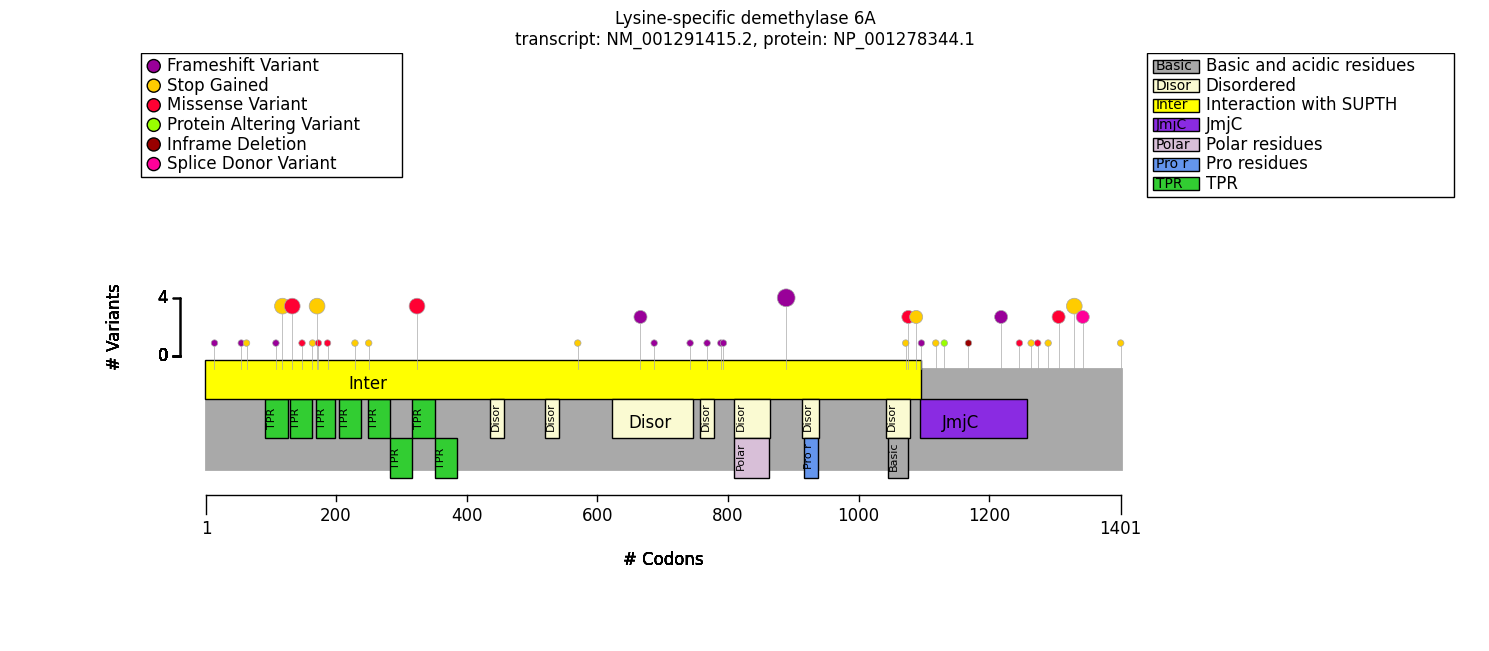

In [7]:
from gpsea.view import ProteinVisualizer
from gpsea.model import ProteinMetadata
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
protein_meta = ProteinMetadata.from_uniprot_json(protein_id=mane_px_id, uniprot_json="O15550.json", label="Lysine-specific demethylase 6A", protein_length=1401 )
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()

## Correlations

### Correlation of **Female vs Male**

In [8]:
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
from gpsea.analysis.mtc_filter import HpoMtcFilter
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.pcats import HpoTermAnalysis


pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

mtc_filter = HpoMtcFilter.default_filter(
    hpo=hpo,
)

mtc_correction = 'fdr_bh'
mtc_alpha = 0.05
count_statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=count_statistic,
    mtc_filter=mtc_filter
)

In [9]:
from gpsea.analysis.predicate.genotype import sex_predicate
from gpsea.view import MtcStatsViewer

mf_predicate = sex_predicate()
mf_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=mf_predicate,
    pheno_predicates=pheno_predicates,
)
viewer = MtcStatsViewer()
viewer.process(mf_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,27
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,81
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,203


In [10]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=mf_result)

Sex of the individual                              FEMALE           MALE  \
                                                    Count Percent  Count   
Intellectual disability, severe [HP:0010864]         7/25     28%  14/18   
Delayed speech and language development [HP:000...  25/30     83%  29/29   
Decreased body weight [HP:0004325]                   5/23     22%  10/20   
Feeding difficulties [HP:0011968]                   28/35     80%  27/28   
Intellectual disability [HP:0001249]                30/34     88%  23/23   
Seizure [HP:0001250]                                 7/26     27%  10/21   
Delayed gross motor development [HP:0002194]        15/18     83%  16/16   
Motor delay [HP:0001270]                            28/31     90%  30/30   
Delayed ability to walk [HP:0031936]                15/22     68%  16/19   
Microcephaly [HP:0000252]                           13/26     50%  11/17   
Short stature [HP:0004322]                          10/25     40%  12/21   
Prominent fingertip pads [HP:0001212]               25/31     81%  10/14   
Hypotonia [HP:0001252]                              30/37     81%  22/27   
Abnormal muscle tone [HP:0003808]                   30/30    100%  22/22   
Abdominal symptom [HP:0011458]                      28/28    100%  27/27   
Neurodevelopmental delay [HP:0012758]               28/28    100%  30/30   
Neurodevelopmental abnormality [HP:0012759]         34/34    100%  32/32   
Language impairment [HP:0002463]                    25/25    100%  29/29   
Abnormal communication [HP:0034434]                 25/25    100%  29/29   
Abnormal speech pattern [HP:0002167]                25/25    100%  29/29   
Abnormal facial shape [HP:0001999]                  46/46    100%  34/34   
Prominent digit pad [HP:0011298]                    25/25    100%  10/10   
Regional abnormality of skin [HP:0011356]           26/26    100%  10/10   
Abnormal fingertip morphology [HP:0001211]          25/25    100%  10/10   
Abnormal finger morphology [HP:0001167]             27/27    100%  10/10   
Abnormal digit morphology [HP:0011297]              32/32    100%  12/12   
Abnormal appendicular skeleton morphology [HP:0...  32/32    100%  12/12   
Narrow palate [HP:0000189]                          19/19    100%  19/19   
Abnormal palate morphology [HP:0000174]             19/19    100%  21/21   
Abnormal oral cavity morphology [HP:0000163]        19/19    100%  21/21   
Neonatal hypoglycemia [HP:0001998]                  19/33     58%  12/22   
Strabismus [HP:0000486]                              9/20     45%   7/15   

Sex of the individual                                                          \
                                                   Percent Corrected p values   
Intellectual disability, severe [HP:0010864]           78%           0.062176   
Delayed speech and language development [HP:000...    100%           0.529572   
Decreased body weight [HP:0004325]                     50%           0.529572   
Feeding difficulties [HP:0011968]                      96%           0.529572   
Intellectual disability [HP:0001249]                  100%           0.894859   
Seizure [HP:0001250]                                   48%           0.950820   
Delayed gross motor development [HP:0002194]          100%           0.950820   
Motor delay [HP:0001270]                              100%           0.950820   
Delayed ability to walk [HP:0031936]                   84%           1.000000   
Microcephaly [HP:0000252]                              65%           1.000000   
Short stature [HP:0004322]                             57%           1.000000   
Prominent fingertip pads [HP:0001212]                  71%           1.000000   
Hypotonia [HP:0001252]                                 81%           1.000000   
Abnormal muscle tone [HP:0003808]                     100%           1.000000   
Abdominal symptom [HP:0011458]                        100%           1.000000   
Neurodevelopmental delay [HP:0012758] 

### Correlation **Mutation Type**

#### **FRAMESHIFT vs rest**

In [11]:
from gpsea.model import VariantEffect

from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

missense = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, mane_tx_id)
missense_pred = monoallelic_predicate(a_predicate=missense,
                                      b_predicate=~missense,
                                      a_label="missense",
                                      b_label="other",)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_pred,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense          other  \
                                                      Count Percent  Count   
Microcephaly [HP:0000252]                               2/8     25%  22/35   
Short stature [HP:0004322]                              2/8     25%  20/38   
Prominent fingertip pads [HP:0001212]                   6/9     67%  29/36   
Seizure [HP:0001250]                                   5/10     50%  12/37   
Intellectual disability [HP:0001249]                   9/10     90%  44/47   
Strabismus [HP:0000486]                                 2/6     33%  14/29   
Hypotonia [HP:0001252]                                  7/8     88%  45/56   
Abnormal muscle tone [HP:0003808]                       7/7    100%  45/45   
Feeding difficulties [HP:0011968]                      9/10     90%  46/53   
Abdominal symptom [HP:0011458]                          9/9    100%  46/46   
Delayed ability to walk [HP:0031936]                    5/7     71%  26/34   
Delayed gross motor development [HP:0002194]            5/5    100%  26/29   
Motor delay [HP:0001270]                              11/11    100%  47/50   
Neurodevelopmental delay [HP:0012758]                 11/11    100%  47/47   
Neurodevelopmental abnormality [HP:0012759]           12/12    100%  54/54   
Delayed speech and language development [HP:000...    10/11     91%  44/48   
Language impairment [HP:0002463]                      10/10    100%  44/44   
Abnormal communication [HP:0034434]                   10/10    100%  44/44   
Abnormal speech pattern [HP:0002167]                  10/10    100%  44/44   
Abnormal facial shape [HP:0001999]                    16/16    100%  64/64   
Prominent digit pad [HP:0011298]                        6/6    100%  29/29   
Regional abnormality of skin [HP:0011356]               6/6    100%  30/30   
Abnormal fingertip morphology [HP:0001211]              6/6    100%  29/29   
Abnormal finger morphology [HP:0001167]                 6/6    100%  31/31   
Abnormal digit morphology [HP:0011297]                  8/8    100%  36/36   
Abnormal appendicular skeleton morphology [HP:0...      8/8    100%  36/36   
Narrow palate [HP:0000189]                              4/4    100%  34/34   
Abnormal palate morphology [HP:0000174]                 4/4    100%  36/36   
Abnormal oral cavity morphology [HP:0000163]            4/4    100%  36/36   
Neonatal hypoglycemia [HP:0001998]                      5/9     56%  26/46   
Intellectual disability, severe [HP:0010864]            3/6     50%  18/37   

Allele group                                                                   \
                                                   Percent Corrected p values   
Microcephaly [HP:0000252]                              63%                1.0   
Short stature [HP:0004322]                             53%                1.0   
Prominent fingertip pads [HP:0001212]                  81%                1.0   
Seizure [HP:0001250]                                   32%                1.0   
Intellectual disability [HP:0001249]                   94%                1.0   
Strabismus [HP:0000486]                                48%                1.0   
Hypotonia [HP:0001252]                                 80%                1.0   
Abnormal muscle tone [HP:0003808]                     100%                1.0   
Feeding difficulties [HP:0011968]                      87%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Delayed ability to walk [HP:0031936]                   76%                1.0   
Delayed gross motor development [HP:0002194]           90%                1.0   
Motor delay [HP:0001270]                               94%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Delayed speech and language development [HP:000.

In [12]:
ablation = VariantPredicates.variant_effect(VariantEffect.TRANSCRIPT_ABLATION, tx_id=mane_tx_id) # most common pathogenic allele, n=10
ablation_pred = monoallelic_predicate(a_predicate=ablation,
                                      b_predicate=~ablation,
                                      a_label="SV",
                                      b_label="other",)

ablation_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=ablation_pred,
    pheno_predicates=pheno_predicates,
)

summarize_hpo_analysis(hpo=hpo, result=ablation_result)

Allele group                                           SV          other  \
                                                    Count Percent  Count   
Prominent fingertip pads [HP:0001212]                 8/8    100%  27/37   
Delayed ability to walk [HP:0031936]                  5/5    100%  26/36   
Strabismus [HP:0000486]                               5/8     62%  11/27   
Delayed speech and language development [HP:000...    8/9     89%  46/50   
Microcephaly [HP:0000252]                             3/4     75%  21/39   
Seizure [HP:0001250]                                  3/6     50%  14/41   
Hypotonia [HP:0001252]                                7/9     78%  45/55   
Neonatal hypoglycemia [HP:0001998]                   5/10     50%  26/45   
Abnormal muscle tone [HP:0003808]                     7/7    100%  45/45   
Feeding difficulties [HP:0011968]                    9/10     90%  46/53   
Abdominal symptom [HP:0011458]                        9/9    100%  46/46   
Delayed gross motor development [HP:0002194]          5/5    100%  26/29   
Motor delay [HP:0001270]                              9/9    100%  49/52   
Neurodevelopmental delay [HP:0012758]                 9/9    100%  49/49   
Neurodevelopmental abnormality [HP:0012759]           9/9    100%  57/57   
Language impairment [HP:0002463]                      8/8    100%  46/46   
Abnormal communication [HP:0034434]                   8/8    100%  46/46   
Abnormal speech pattern [HP:0002167]                  8/8    100%  46/46   
Intellectual disability [HP:0001249]                  8/8    100%  45/49   
Short stature [HP:0004322]                            2/4     50%  20/42   
Abnormal facial shape [HP:0001999]                  10/10    100%  70/70   
Prominent digit pad [HP:0011298]                      8/8    100%  27/27   
Regional abnormality of skin [HP:0011356]             8/8    100%  28/28   
Abnormal fingertip morphology [HP:0001211]            8/8    100%  27/27   
Abnormal finger morphology [HP:0001167]               8/8    100%  29/29   
Abnormal digit morphology [HP:0011297]                8/8    100%  36/36   
Abnormal appendicular skeleton morphology [HP:0...    8/8    100%  36/36   
Narrow palate [HP:0000189]                            6/6    100%  32/32   
Abnormal palate morphology [HP:0000174]               6/6    100%  34/34   
Abnormal oral cavity morphology [HP:0000163]          6/6    100%  34/34   
Intellectual disability, severe [HP:0010864]          4/8     50%  17/35   

Allele group                                                                   \
                                                   Percent Corrected p values   
Prominent fingertip pads [HP:0001212]                  73%                1.0   
Delayed ability to walk [HP:0031936]                   72%                1.0   
Strabismus [HP:0000486]                                41%                1.0   
Delayed speech and language development [HP:000...     92%                1.0   
Microcephaly [HP:0000252]                              54%                1.0   
Seizure [HP:0001250]                                   34%                1.0   
Hypotonia [HP:0001252]                                 82%                1.0   
Neonatal hypoglycemia [HP:0001998]                     58%                1.0   
Abnormal muscle tone [HP:0003808]                     100%                1.0   
Feeding difficulties [HP:0011968]                      87%                1.0   
Abdominal symptom [HP:0011458]                        100%                1.0   
Delayed gross motor development [HP:0002194]           90%                1.0   
Motor delay [HP:0001270]                               94%                1.0   
Neurodevelopmental delay [HP:0012758]                 100%                1.0   
Neurodevelopmental abnormality [HP:0012759]           100%                1.0   
Language impairment [HP:0002463]                      100%                1.0   
Abnormal communication [HP:003443

### Correlation specific Variant 

In [13]:
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
is_var_key = VariantPredicates.variant_key("X_45070166_45070170_CACAA_C") # identified four times in dataset

gt_predicate = monoallelic_predicate(
    a_predicate=is_var_key,
    b_predicate= ~is_var_key,
    a_label= 'p.Asn891ValfsTer27',
    b_label='Other')
gt_predicate.display_question()
ans89_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=ans89_result)


Allele group                                       p.Asn891ValfsTer27          \
                                                                Count Percent   
Pulmonic stenosis [HP:0001642]                                    2/2    100%   
Atrial septal defect [HP:0001631]                                 2/2    100%   
Seizure [HP:0001250]                                              2/2    100%   
Ventricular septal defect [HP:0001629]                            1/2     50%   
Prominent fingertip pads [HP:0001212]                             2/3     67%   
Feeding difficulties [HP:0011968]                                 1/1    100%   
Abdominal symptom [HP:0011458]                                    1/1    100%   
Motor delay [HP:0001270]                                          2/2    100%   
Neurodevelopmental delay [HP:0012758]                             2/2    100%   
Neurodevelopmental abnormality [HP:0012759]                       2/2    100%   
Delayed speech and language development [HP:000...                2/2    100%   
Language impairment [HP:0002463]                                  2/2    100%   
Abnormal communication [HP:0034434]                               2/2    100%   
Abnormal speech pattern [HP:0002167]                              2/2    100%   
Abnormal facial shape [HP:0001999]                                4/4    100%   
Prominent digit pad [HP:0011298]                                  2/2    100%   
Regional abnormality of skin [HP:0011356]                         2/2    100%   
Abnormal fingertip morphology [HP:0001211]                        2/2    100%   
Abnormal finger morphology [HP:0001167]                           2/2    100%   
Abnormal digit morphology [HP:0011297]                            3/3    100%   
Abnormal appendicular skeleton morphology [HP:0...                3/3    100%   
Narrow palate [HP:0000189]                                        2/2    100%   
Abnormal palate morphology [HP:0000174]                           2/2    100%   
Abnormal oral cavity morphology [HP:0000163]                      2/2    100%   

Allele group                                        Other          \
                                                    Count Percent   
Pulmonic stenosis [HP:0001642]                       0/59      0%   
Atrial septal defect [HP:0001631]                   14/59     24%   
Seizure [HP:0001250]                                15/45     33%   
Ventricular septal defect [HP:0001629]               4/59      7%   
Prominent fingertip pads [HP:0001212]               33/42     79%   
Feeding difficulties [HP:0011968]                   54/62     87%   
Abdominal symptom [HP:0011458]                      54/54    100%   
Motor delay [HP:0001270]                            56/59     95%   
Neurodevelopmental delay [HP:0012758]               56/56    100%   
Neurodevelopmental abnormality [HP:0012759]         64/64    100%   
Delayed speech and language development [HP:000...  52/57     91%   
Language impairment [HP:0002463]                    52/52    100%   
Abnormal communication [HP:0034434]                 52/52    100%   
Abnormal speech pattern [HP:0002167]                52/52    100%   
Abnormal facial shape [HP:0001999]                  76/76    100%   
Prominent digit pad [HP:0011298]                    33/33    100%   
Regional abnormality of skin [HP:0011356]           34/34    100%   
Abnormal fingertip morphology [HP:0001211]          33/33    100%   
Abnormal finger morphology [HP:0001167]             35/35    100%   
Abnormal digit morphology [HP:0011297]              41/41    100%   
Abnormal appendicular skeleton morphology [HP:0...  41/41    100%   
Narrow palate [HP:0000189]                          36/36    100%   
Abnormal palate morphology [HP:0000174]             38/38    100%   
Abnormal oral cavity morphology [HP:0000163]        38/38    100%   

Allele group                                                           \
                         

### Summary

-  **M vs F**: significant correlation found regarding severe intellectual disability (corrected p.value: 0.044): Male were found to have more severe intelectual disability

- **Mutation Types** : no significant correlation found

- **Specific Variant**: Significant correlation found for "X_45070166_45070170_CACAA_C" 
for Pulmonic stenosis [HP:0001642] (corrected p.value 0.0049) but to be taken with caution due to low number of instances of the variant.


